<big> Example with real data - Wine data set with 12 features </big>

In [1]:
#QUESTION 1

In [2]:
#imports
from sklearn.datasets import load_iris
import seaborn as sns

#Load the iris dataset using seaborn
data = sns.load_dataset('iris')

In [3]:
#kmeans imports
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
import numpy as np
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
%matplotlib notebook

In [4]:
#turn into an array
iris = data.values

#remove 5th feature which is class name for X axis
X = iris[:,:-1]

#seperately grab the class name for Y axis
Y = iris[:,-1]

In [5]:
#kmeans

#avoid memory leak
OMP_NUM_THREADS=1

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
cluster_labels = kmeans.predict(X)

#cluster centers are averages
print(kmeans.cluster_centers_)

# need to show the average value of each feature by cluster in a 3x4 table

C:\Users\timst\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


In [6]:
# import module
from tabulate import tabulate
 
# create headers, sepal length, sepal width, petal length, petal width
head = ["mean sepal length", "mean sepal width", "mean petal length", "mean petal width"]
 
# display table
print(tabulate(kmeans.cluster_centers_, headers=head, tablefmt="grid"))

+---------------------+--------------------+---------------------+--------------------+
|   mean sepal length |   mean sepal width |   mean petal length |   mean petal width |
+=====================+====================+=====================+====================+
|             5.90161 |            2.74839 |             4.39355 |            1.43387 |
+---------------------+--------------------+---------------------+--------------------+
|             5.006   |            3.428   |             1.462   |            0.246   |
+---------------------+--------------------+---------------------+--------------------+
|             6.85    |            3.07368 |             5.74211 |            2.07105 |
+---------------------+--------------------+---------------------+--------------------+


In [7]:
#QUESTION 2

In [8]:
#normalize the data
from sklearn.preprocessing import normalize

X = normalize(X, axis=0, norm='max')

In [9]:
#PCA to grab the first 2 output components
pca = PCA(n_components = 2)
pca.fit(X)

# X2d is the first 2 principle components
X2d = pca.transform(X)

<IPython.core.display.Javascript object>


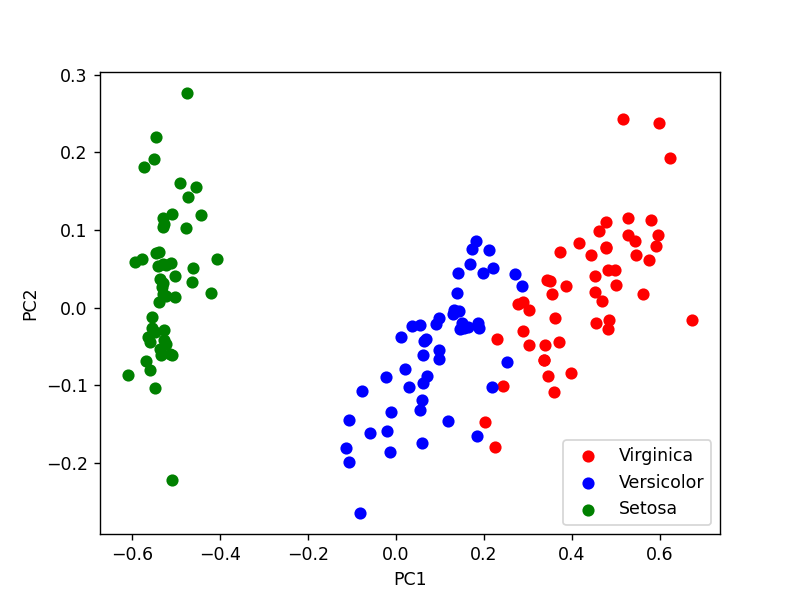

In [10]:
#supervised learning plot using the 2 new PCA components
plt.scatter(X2d[Y == 'virginica', 0], X2d[Y == 'virginica', 1], c='r', label='Virginica')
plt.scatter(X2d[Y == 'versicolor', 0], X2d[Y == 'versicolor', 1], c='b', label='Versicolor')
plt.scatter(X2d[Y == 'setosa', 0], X2d[Y == 'setosa', 1], c='g', label='Setosa')

labels = ['Virginica', 'Versicolor', 'Setosa']

plt.xlabel('PC1')
plt.ylabel('PC2')

plt.legend(labels)

C:\Users\timst\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<IPython.core.display.Javascript object>


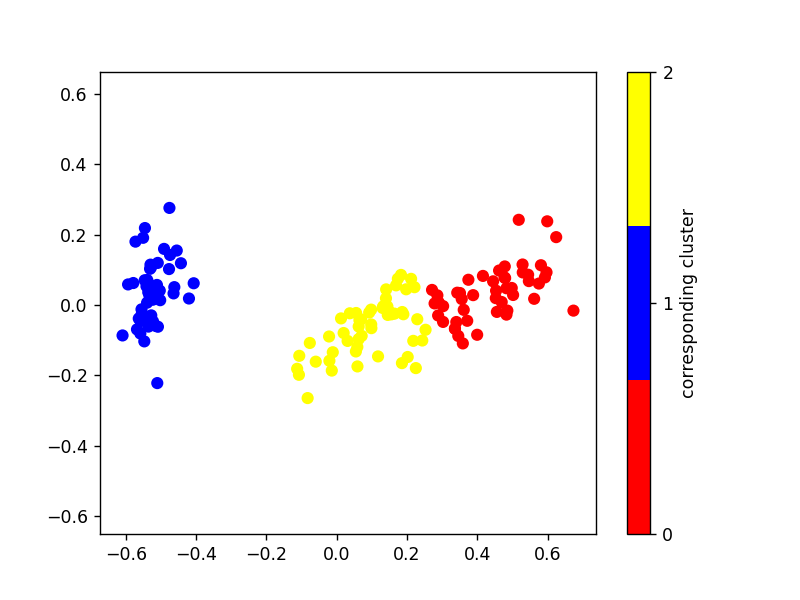

In [11]:
# unsupervised learning plot using the 2 new PCA components
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
cluster_labels = kmeans.predict(X)

fig = plt.figure()
colors = ['red','blue','yellow']
plt.scatter(X2d[:,0],X2d[:,1],c=cluster_labels,cmap=matplotlib.colors.ListedColormap(colors))
plt.axis('equal')

# to add cluster assignment labels to plot
ticks = np.unique(cluster_labels)
cb = plt.colorbar(spacing = 'proportional', ticks=ticks)
cb.set_label('corresponding cluster')

plt.show()